Heigon Soldera 217638
Rafael Galib 204904

In [1109]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

In [1110]:
with open('kick1.dat') as f:
    lines = f.readlines()
    xyz = np.array([[float(line.split()[0]),float(line.split()[1]),float(line.split()[2])] for line in lines])


    X = xyz[:,0]
    Y = xyz[:,1]
    Z = xyz[:,2]

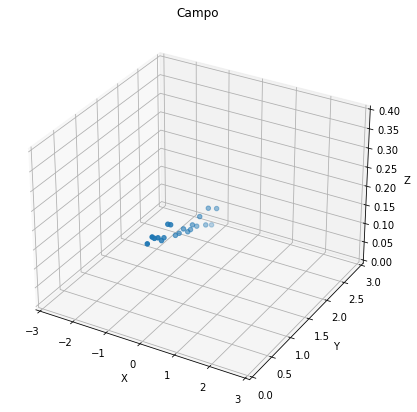

In [1111]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Estimando X em função de Y
Aqui tentaremos calcular X(y) utilizando regressão linear e polinomial

# Linear Regression

# Hipótese
  
## $h_{\theta}(y) = x = \theta_0 + \theta_1 y$

In [1112]:
def h_yLin(t0,t1,y):
    x = t0 + t1*y 
    return x

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - x)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $
  


# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $
  

In [1113]:
t0A_yLin = 0
t1A_yLin = 0
alpha = 0.2
m = len(X)

for j in range(1001):

    soma = 0
    for i in range(m):
        soma += (h_yLin(t0A_yLin,t1A_yLin, Y[i]) - X[i]) * 1
    t0N_yLin = t0A_yLin - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h_yLin(t0A_yLin,t1A_yLin,Y[i]) - X[i]) * Y[i]
    t1N_yLin = t1A_yLin - (alpha/m) * soma


    t0A_yLin = t0N_yLin
    t1A_yLin = t1N_yLin

print(t0N_yLin)
print(t1N_yLin)

-2.271710596960016
0.9795842754302305


In [1114]:
newX_yLin = []
for i in range(20):
    newX_yLin.append(h_yLin(t0N_yLin,t1N_yLin,Y[i]))

In [1115]:
soma = 0
for j in range(20):
    soma += (newX_yLin[j] - X[j])**2
msr = soma/20
print(msr)

0.0009345341342010616


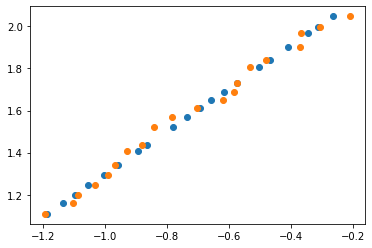

In [1116]:
plt.scatter(newX_yLin,Y)
plt.scatter(X,Y)
plt.show()

# Polynomial Regression

# Hipótese
  
## $h_{\theta}(y) = x = \theta_0 + \theta_1 y + \theta_2 y^2$

In [1117]:
def h_yPol(t0,t1,t2,y):
    x = t0 + t1*y + t2*y**2
    return x

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - x)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y^2 $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - x) \times y^2 $
  

In [1118]:
t0A_yPol = 0
t1A_yPol = 0
t2A_yPol = 0
alpha = 0.1
m = len(X)

for j in range(1001):

    soma = 0
    for i in range(m):
        soma += (h_yPol(t0A_yPol,t1A_yPol,t2A_yPol, Y[i]) - X[i]) * 1
    t0N_yPol = t0A_yPol - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h_yPol(t0A_yPol,t1A_yPol,t2A_yPol,Y[i]) - X[i]) * Y[i]
    t1N_yPol = t1A_yPol - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h_yPol(t0A_yPol,t1A_yPol,t2A_yPol,Y[i]) - X[i]) * Y[i]**2
    t2N_yPol = t2A_yPol - (alpha/m) * soma


    t0A_yPol = t0N_yPol
    t1A_yPol = t1N_yPol
    t2A_yPol = t2N_yPol

print(t0N_yPol)
print(t1N_yPol)
print(t2N_yPol)

-1.0657434374176151
-0.6057758292625925
0.5035243169539055


In [1119]:
newX_yPol = []
for i in range(20):
    newX_yPol.append(h_yPol(t0N_yPol,t1N_yPol,t2N_yPol,Y[i]))

In [1120]:
soma = 0
for j in range(20):
    soma += (newX_yPol[j] - X[j])**2
msr = soma/20
print(msr)

0.0013107192495763324


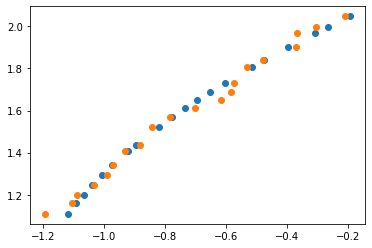

In [1121]:
plt.scatter(newX_yPol,Y)
plt.scatter(X,Y)
plt.show()

# Copiar a partir daqui vvv

# Linear Regression

# Hipótese
  
## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y$

In [1122]:
def h(t0,t1,t2,x,y):
    z = t0 + t1*x + t2*y
    return z

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

# Linear Regression

In [1123]:
t0A = 0
t1A = 0
t2A = 0
alpha = 0.1
m = len(X)

for j in range(101):

    soma = 0
    for i in range(m):
        soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * 1
    t0N = t0A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * X[i]
    t1N = t1A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h(t0A,t1A,t2A,X[i],Y[i]) - Z[i]) * Y[i]
    t2N = t2A - (alpha/m) * soma

    t0A = t0N
    t1A = t1N
    t2A = t2N
print(t0N)
print(t1N)
print(t2N)

0.031228227984843582
-0.029212205334348398
0.04252152698289937


# Usando X Y para prever um z

In [1124]:
newZ = []
for i in range(20):
    newZ.append(h(t0N,t1N,t2N,X[i],Y[i]))

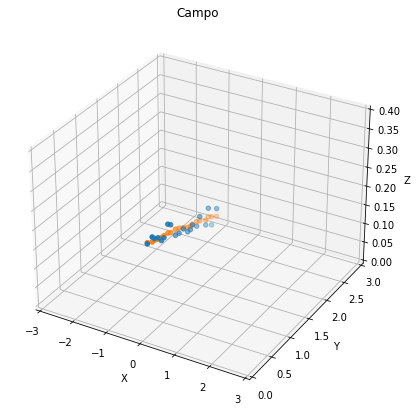

In [1125]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.scatter3D(X,Y,newZ,'r')
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Regression Evalution

##  Mean Squared Root

## $\frac{1}{n} \sum_{j =1}^n (\bar{z}_j - z_j)^2$


In [1126]:
soma = 0
for j in range(20):
    soma += (newZ[j] - Z[j])**2
msr = soma/20
print(msr)

0.0001962651725349547


# Chutando uns x e y novos para ver como fica (Agora usando regressão)

In [1127]:
y = Y[0]
listX = []
listY = []
listZ = []
while y > 0:
    listY.append(y)

    listX.append(h_yLin(t0N_yLin,t1N_yLin,y))

    listZ.append(h(t0N,t1N,t2N,listX[len(listX)-1],y))
    
    y -= 0.05

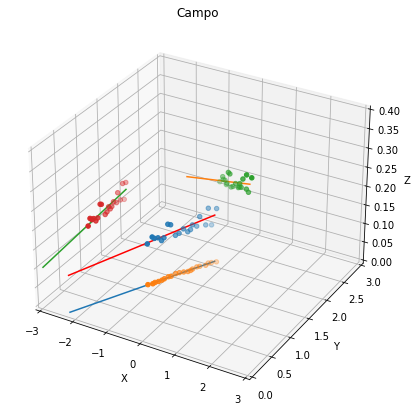

In [1128]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(listX,listY,listZ,'r')
ax.scatter3D(X, Y, np.zeros(len(Z)))
ax.plot3D(listX, listY, np.zeros(len(listZ)))
ax.scatter3D(X, np.ones(len(Y)) * 3, Z)
ax.scatter3D(np.ones(len(X)) * (-3), Y, Z)
ax.plot3D(listX, np.ones(len(listY)) * 3, listZ)
ax.plot3D(np.ones(len(listX)) * (-3), listY, listZ)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Polynomial Regression

In [1129]:
with open('kick2.dat') as f:
    lines = f.readlines()
    xyz = np.array([[float(line.split()[0]),float(line.split()[1]),float(line.split()[2])] for line in lines])


    X = xyz[:,0]
    Y = xyz[:,1]
    Z = xyz[:,2]

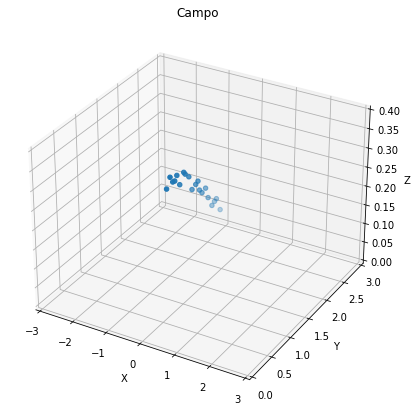

In [1130]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Copiando aqui a regressão p xy

In [1131]:
t0A_yLin2 = 0
t1A_yLin2 = 0
alpha = 0.2
m = len(X)

for j in range(1001):

    soma = 0
    for i in range(m):
        soma += (h_yLin(t0A_yLin2,t1A_yLin2, Y[i]) - X[i]) * 1
    t0N_yLin2 = t0A_yLin2 - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h_yLin(t0A_yLin2,t1A_yLin2,Y[i]) - X[i]) * Y[i]
    t1N_yLin2 = t1A_yLin2 - (alpha/m) * soma


    t0A_yLin2 = t0N_yLin2
    t1A_yLin2 = t1N_yLin2

print(t0N_yLin2)
print(t1N_yLin2)

-1.1278624556052563
0.4851338133565541


In [1132]:
newX_yLin2 = []
for i in range(20):
    newX_yLin2.append(h_yLin(t0N_yLin2,t1N_yLin2,Y[i]))

In [1133]:
soma = 0
for j in range(20):
    soma += (newX_yLin2[j] - X[j])**2
msr = soma/20
print(msr)

0.0002837122989698192


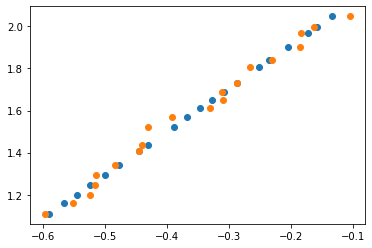

In [1134]:
plt.scatter(newX_yLin2,Y)
plt.scatter(X,Y)
plt.show()

In [ ]:
t0A_yPol = 0
t1A_yPol = 0
t2A_yPol = 0
alpha = 0.1
m = len(X)

for j in range(1001):

    soma = 0
    for i in range(m):
        soma += (h_yPol(t0A_yPol,t1A_yPol,t2A_yPol, Y[i]) - X[i]) * 1
    t0N_yPol = t0A_yPol - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h_yPol(t0A_yPol,t1A_yPol,t2A_yPol,Y[i]) - X[i]) * Y[i]
    t1N_yPol = t1A_yPol - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h_yPol(t0A_yPol,t1A_yPol,t2A_yPol,Y[i]) - X[i]) * Y[i]**2
    t2N_yPol = t2A_yPol - (alpha/m) * soma


    t0A_yPol = t0N_yPol
    t1A_yPol = t1N_yPol
    t2A_yPol = t2N_yPol

print(t0N_yPol)
print(t1N_yPol)
print(t2N_yPol)

In [ ]:
newX_yPol = []
for i in range(20):
    newX_yPol.append(h_yPol(t0N_yPol,t1N_yPol,t2N_yPol,Y[i]))

In [ ]:
soma = 0
for j in range(20):
    soma += (newX_yPol[j] - X[j])**2
msr = soma/20
print(msr)

In [ ]:
plt.scatter(newX_yPol,Y)
plt.scatter(X,Y)
plt.show()

# Hipótese

## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 x^2 + \theta_4 y^2$

In [1135]:
def h2(t0,t1,t2,t3,t4,x,y):
    z = t0 + t1*x + t2*y + t3 * x**2 + t4 * y**2
    return z

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $
  
## $ \frac{\partial}{\partial \theta_3} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
  
## $ \frac{\partial}{\partial \theta_4} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $\theta_{3} := \theta_{3} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $

## $\theta_{4} := \theta_{4} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

In [1136]:
t0A = 0
t1A = 0
t2A = 0
t3A = 0
t4A = 0
alpha = 0.15
m = len(X)

for j in range(2000):

    soma = 0
    for i in range(m):
        soma += (h2(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * 1
    t0N = t0A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h2(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * X[i]
    t1N = t1A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h2(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * Y[i]
    t2N = t2A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h2(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * X[i]**2
    t3N = t3A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h2(t0A,t1A,t2A,t3A,t4A,X[i],Y[i]) - Z[i]) * Y[i]**2
    t4N = t4A - (alpha/m) * soma

    t0A = t0N
    t1A = t1N
    t2A = t2N
    t3A = t3N
    t4A = t4N
print(t0N)
print(t1N)
print(t2N)
print(t3N)
print(t4N)

0.1528337457407165
-0.11337824154136568
0.14520409287262953
0.022264831419290424
-0.07339602214038743


# Usando X Y para prever um z

In [1137]:
newZ = []
for i in range(20):
    newZ.append(h2(t0N,t1N,t2N,t3N,t4N,X[i],Y[i]))

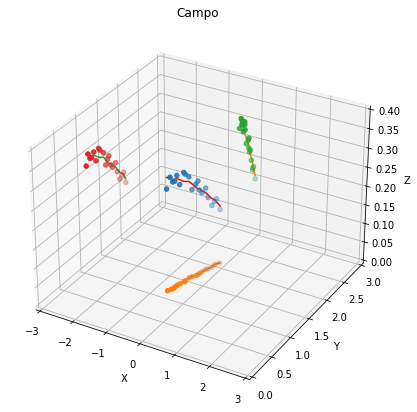

In [1138]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(X, Y, newZ,'r')
ax.scatter3D(X, Y, np.zeros(len(Z)))
ax.plot3D(X, Y, np.zeros(len(Z)))
ax.scatter3D(X, np.ones(len(Y)) * 3, Z)
ax.scatter3D(np.ones(len(X)) * (-3), Y, Z)
ax.plot3D(X, np.ones(len(Y)) * 3, newZ)
ax.plot3D(np.ones(len(X)) * (-3), Y, newZ)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

In [1139]:
soma = 0
for j in range(20):
    soma += (newZ[j] - Z[j])**2
msr = soma/20
print(msr)

0.00018309345129690924


# Hipótese

## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 xy + \theta_4 x^2 + \theta_5 y^2$

In [1140]:
def h3(t0,t1,t2,t3,t4,t5,x,y):
    z = t0 + t1*x + t2*y + t3 *x*y + t4 * x**2 + t5 * y**2
    return z

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $ \frac{\partial}{\partial \theta_3} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $
  
## $ \frac{\partial}{\partial \theta_4} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
  
## $ \frac{\partial}{\partial \theta_5} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $\theta_{3} := \theta_{3} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $

## $\theta_{4} := \theta_{4} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $

## $\theta_{5} := \theta_{5} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

In [1141]:
t0A = 0
t1A = 0
t2A = 0
t3A = 0
t4A = 0
t5A = 0
alpha = 0.15
m = len(X)

for j in range(2000):

    soma = 0
    for i in range(m):
        soma += (h3(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * 1
    t0N = t0A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h3(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * X[i]
    t1N = t1A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h3(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * Y[i]
    t2N = t2A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h3(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * ( X[i] * Y[i])
    t3N = t3A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h3(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * X[i]**2
    t4N = t4A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h3(t0A,t1A,t2A,t3A,t4A,t5A,X[i],Y[i]) - Z[i]) * Y[i]**2
    t5N = t5A - (alpha/m) * soma

    t0A = t0N
    t1A = t1N
    t2A = t2N
    t3A = t3N
    t4A = t4N
    t5A = t5N

print(t0N)
print(t1N)
print(t2N)
print(t3N)
print(t4N)
print(t5N)

0.11214711092877334
-0.07380361095735924
0.09607636217338705
-0.1250287925815378
0.018875131263023676
-0.04750121691408037


In [1142]:
newZ = []
for i in range(20):
    newZ.append(h3(t0N,t1N,t2N,t3N,t4N,t5N,X[i],Y[i]))

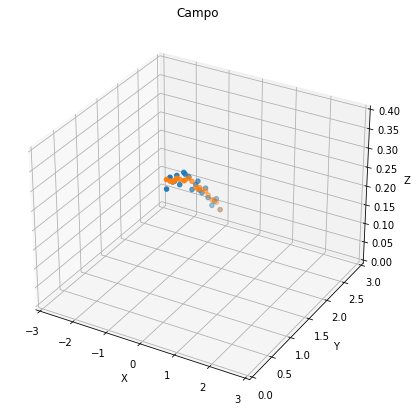

In [1143]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.scatter3D(X,Y,newZ,'r')
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

In [1144]:
soma = 0
for j in range(20):
    soma += (newZ[j] - Z[j])**2
msr = soma/20
print(msr)

0.00015579503650514133


In [1145]:
listZ = []
y = Y[0]
x = X[0]
listX = []
listY = []
while y >= 0:
    listZ.append(h3(t0N,t1N,t2N,t3N,t4N,t5N,x,y))
    listX.append(x)
    listY.append(y)
    x -= 0.025
    y -= 0.05

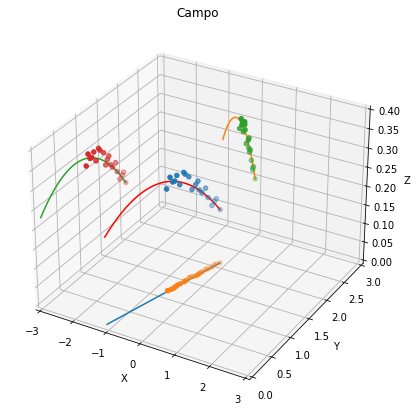

In [1146]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(listX,listY,listZ,'r')
ax.scatter3D(X, Y, np.zeros(len(Z)))
ax.plot3D(listX, listY, np.zeros(len(listZ)))
ax.scatter3D(X, np.ones(len(Y)) * 3, Z)
ax.scatter3D(np.ones(len(X)) * (-3), Y, Z)
ax.plot3D(listX, np.ones(len(listY)) * 3, listZ)
ax.plot3D(np.ones(len(listX)) * (-3), listY, listZ)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

# Hipótese

## $h_{\theta}(x,y) = z = \theta_0 + \theta_1 x + \theta_2 y + \theta_3 xy + \theta_4 x^2 + \theta_5 y^2 + \theta_6 x^2y + \theta_7 xy^2 + \theta_8 x^2y^2$

In [1147]:
def h4(t0,t1,t2,t3,t4,t5,t6,t7,t8,x,y):
    z = t0 + t1*x + t2*y + t3 *x*y + t4 * x**2 + t5 * y**2 + t6 * x**2 * y + t7 * x * y**2 + t8 * x**2 * y**2
    return z

# Função de Custo 
## $J(\theta) = \frac{1}{2m} \sum^m_{i=1} (h_{\theta} - z)^2 $

# Derivadas 
  
## $ \frac{\partial}{\partial \theta_0} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $ \frac{\partial}{\partial \theta_1} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $ \frac{\partial}{\partial \theta_2} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $ \frac{\partial}{\partial \theta_3} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $
  
## $ \frac{\partial}{\partial \theta_4} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $
  
## $ \frac{\partial}{\partial \theta_5} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

## $ \frac{\partial}{\partial \theta_6} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y $

## $ \frac{\partial}{\partial \theta_7} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy^2 $

## $ \frac{\partial}{\partial \theta_8} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y^2 $

# Atualização dos $\theta$
  
## $\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times 1 $
  
## $\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x $
  
## $\theta_{2} := \theta_{2} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y $

## $\theta_{3} := \theta_{3} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy $

## $\theta_{4} := \theta_{4} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2 $

## $\theta_{5} := \theta_{5} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times y^2 $

## $\theta_{6} := \theta_{6} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y $

## $\theta_{7} := \theta_{7} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times xy^2 $

## $\theta_{8} := \theta_{8} - \alpha \frac{1}{m} \sum^m_{i=1} (h_{\theta} - z) \times x^2y^2 $

In [1148]:
t0A = 0
t1A = 0
t2A = 0
t3A = 0
t4A = 0
t5A = 0
t6A = 0
t7A = 0
t8A = 0
alpha = 0.1
m = len(X)

for j in range(3000):

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * 1
    t0N = t0A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * X[i]
    t1N = t1A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * Y[i]
    t2N = t2A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * ( X[i] * Y[i])
    t3N = t3A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (X[i]**2)
    t4N = t4A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (Y[i]**2)
    t5N = t5A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * ((X[i]**2) * Y[i])
    t6N = t6A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * (X[i] * (Y[i]**2))
    t7N = t7A - (alpha/m) * soma

    soma = 0
    for i in range(m):
        soma += (h4(t0A,t1A,t2A,t3A,t4A,t5A,t6A,t7A,t8A,X[i],Y[i]) - Z[i]) * ((X[i]**2) * (Y[i]**2))
    t8N = t8A - (alpha/m) * soma

    t0A = t0N
    t1A = t1N
    t2A = t2N
    t3A = t3N
    t4A = t4N
    t5A = t5N
    t6A = t6N
    t7A = t7N
    t8A = t8N
print(t0N)
print(t1N)
print(t2N)
print(t3N)
print(t4N)
print(t5N)
print(t6N)
print(t7N)
print(t8N)

0.10647227757537578
-0.062371221971935925
0.07065420835655727
-0.06262134180928774
0.030164322905485385
-0.035883176794936744
0.03781007402989041
-0.038980804353137645
0.0405331499593436


In [1149]:
newZ = []
for i in range(20):
    newZ.append(h4(t0N,t1N,t2N,t3N,t4N,t5N,t6N,t7N,t8N,X[i],Y[i]))

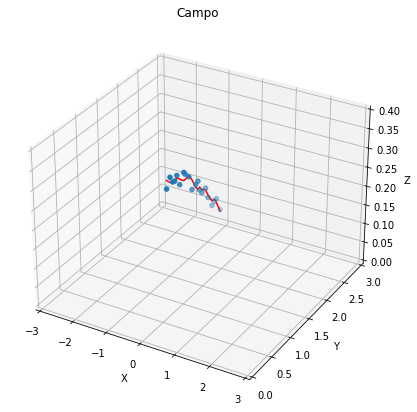

In [1150]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(X,Y,newZ,'r')
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

In [1151]:
soma = 0
for j in range(20):
    soma += (newZ[j] - Z[j])**2
msr = soma/20
print(msr)

0.00016097588675901604


In [1152]:
listZ = []
y = Y[0]
x = X[0]
listX = []
listY = []
while y >= 0:
    listZ.append(h4(t0N,t1N,t2N,t3N,t4N,t5N,t6N,t7N,t8N,x,y))
    listX.append(x)
    listY.append(y)
    x -= 0.025
    y -= 0.05

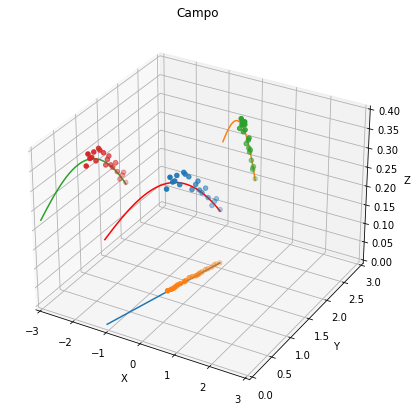

In [1153]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X, Y, Z)
ax.plot3D(listX,listY,listZ,'r')
ax.scatter3D(X, Y, np.zeros(len(Z)))
ax.plot3D(listX, listY, np.zeros(len(listZ)))
ax.scatter3D(X, np.ones(len(Y)) * 3, Z)
ax.scatter3D(np.ones(len(X)) * (-3), Y, Z)
ax.plot3D(listX, np.ones(len(listY)) * 3, listZ)
ax.plot3D(np.ones(len(listX)) * (-3), listY, listZ)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 0.4)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Campo")
plt.show()

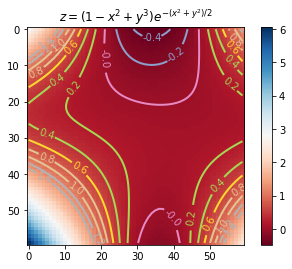

In [1154]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
 
x = arange(-3.0,3.0,0.1)
y = arange(-3.0,3.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = h4(t0N,t1N,t2N,t3N,t4N,t5N,t6N,t7N,t8N,X,Y) # evaluation of the function on the grid

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('$z=(1-x^2+y^3) e^{-(x^2+y^2)/2}$')
show()

<ipython-input-1155-0e2361366ceb>:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


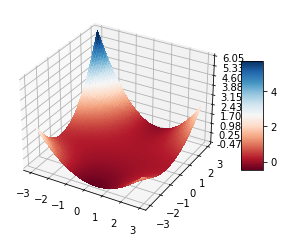

In [1155]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))



fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()